In [1]:
from load_mnist import load_mnist
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
from sklearn.metrics import precision_recall_fscore_support
import time
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:

train_data, train_label = load_mnist("","train")
test_data,test_label = load_mnist("","t10k")

sc = StandardScaler()
X_main_std = sc.fit(train_data)

train_data = X_main_std.transform(train_data)
test_data = X_main_std.transform(test_data)


d:\python\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\python\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
d:\python\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Cross validation to find appropriate parameter(max depth)

# Maxdepth = [2,4,6,10,15]
# for maxdepth in Maxdepth:
#     t1 = time.time()
#     clf = tree.DecisionTreeClassifier(max_depth = maxdepth)
#     scores = cross_val_score(clf, train_data, train_label, cv=10)
#     t2 = time.time()
#     total_time = t2-t1
#     print("maxdepth is ",str(maxdepth),". Time:",str(total_time),"seconds\n","Scores:",scores, "\nAverage Score:", sum(scores)/len(scores))

# got following
# times = [37.393863916397095 , 72.5746283531189 ,103.72337198257446 ,  170.10152173042297 ,236.2970426082611  ]
# cv_accuracy = [0.35668333333333335,0.6515, 0.7325999999999999,0.8127166666666668,  0.8163499999999999]

maxdepth is  2 . Time: 37.393863916397095 seconds
 Scores: [0.35633333 0.35616667 0.3575     0.3555     0.35916667 0.35666667
 0.35883333 0.35816667 0.35616667 0.35233333] 
Average Score: 0.35668333333333335
maxdepth is  4 . Time: 72.5746283531189 seconds
 Scores: [0.65716667 0.652      0.64616667 0.64716667 0.65133333 0.65483333
 0.65083333 0.65766667 0.649      0.64883333] 
Average Score: 0.6515
maxdepth is  6 . Time: 103.72337198257446 seconds
 Scores: [0.7335     0.73216667 0.73083333 0.7335     0.72666667 0.73966667
 0.73266667 0.739      0.7275     0.7305    ] 
Average Score: 0.7325999999999999
maxdepth is  10 . Time: 170.10152173042297 seconds
 Scores: [0.81233333 0.81516667 0.8005     0.81183333 0.823      0.81083333
 0.81483333 0.81616667 0.81216667 0.81033333] 
Average Score: 0.8127166666666668
maxdepth is  15 . Time: 236.2970426082611 seconds
 Scores: [0.82166667 0.81216667 0.8015     0.81683333 0.81666667 0.81983333
 0.818      0.8235     0.81516667 0.81816667] 
Average Sco

In [30]:

maxdepth = 15

clf = tree.DecisionTreeClassifier(max_depth = maxdepth)
t1 = time.time()
clf.fit(train_data, train_label)
t2 = time.time()

pred=clf.predict(test_data)
acc_rate = np.sum(pred == test_label) / test_label.shape[0]
print("Time:",str(t2-t1),"seconds\n","Accuracy:",acc_rate)

Time: 26.355899333953857 seconds
 Accuracy: 0.8094


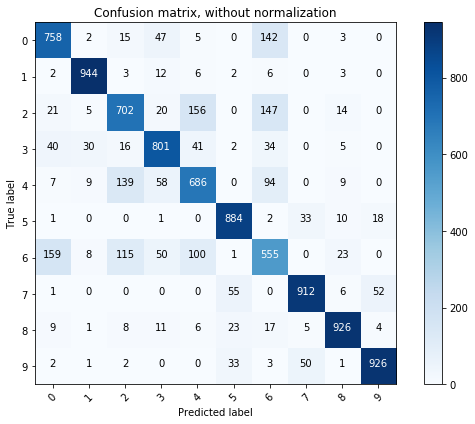

In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(pred, test_label)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')
plt.show()

In [32]:
precision, recall, f1, size = precision_recall_fscore_support(test_label,pred)
print(precision)
print(recall)
print(f1)

[0.78 0.97 0.66 0.83 0.68 0.93 0.55 0.89 0.92 0.91]
[0.76 0.94 0.7  0.8  0.69 0.88 0.56 0.91 0.93 0.93]
[0.77 0.95 0.68 0.81 0.69 0.91 0.55 0.9  0.92 0.92]


In [33]:
cv_accuracy = [0.35668333333333335,0.6515, 0.7325999999999999,0.8127166666666668,  0.8163499999999999]
for i in range(5):
    cv_accuracy[i] *= 100
cv_accuracy

[35.66833333333334,
 65.14999999999999,
 73.25999999999999,
 81.27166666666668,
 81.63499999999999]

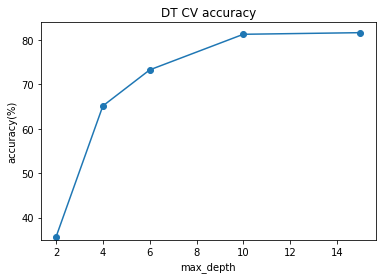

In [37]:
import matplotlib.pyplot as plt
depths = [2,4,6,10,15]

plt.plot(depths,cv_accuracy ,marker='o')
plt.xlabel("max_depth")
plt.ylabel("accuracy(%)")
plt.title("DT CV accuracy")
plt.ylim(ymin=35)
plt.show()


In [38]:
times = [37.393863916397095 , 72.5746283531189 ,103.72337198257446 ,  170.10152173042297 ,236.2970426082611  ]

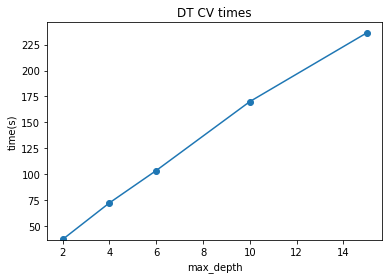

In [39]:
import matplotlib.pyplot as plt
depths = [2,4,6,10,15]

plt.plot(depths,times,marker='o')
plt.xlabel("max_depth")
plt.ylabel("time(s)")
plt.title("DT CV times")
plt.ylim(ymin=37)
plt.show()